In [4]:
import bs4
from bs4 import BeautifulSoup
import requests
import re
import time, os
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import lxml.html as lh
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sqlalchemy import create_engine
engine=create_engine('sqlite://',echo=False)
chromedriver = r"‪C:\Users\DELL\AppData\Roaming\Microsoft\Windo"
os.environ["webdriver.chrome.driver"] = chromedriver

In [5]:
url = 'https://corona-v.com/%D8%A7%D9%84%D8%AF%D9%88%D9%84-%D8%A7%D9%84%D8%B9%D8%B1%D8%A8%D9%8A%D8%A9/%D9%83%D9%88%D8%B1%D9%88%D9%86%D8%A7-%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9/'
response = requests.get(url)
if response.status_code == 200:
    page = response.text
    soup = BeautifulSoup(page, "lxml")
time.sleep(5)


In [6]:
driver=webdriver.Chrome(r"C:\Users\DELL\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\chromedriver.exe")
driver.get(url)

In [7]:
driver.find_element_by_xpath("/html/body/div[1]/div/div[48]").text

'المدينة\nالحالات\nالوفيات\nالتعافي\nالنشطه\nالرياض\n+23\n\n104,812\n19.139%\n+1\n\n1,440\n1.374%\n+11\n\n103,237\n98.497%\n+11▲\n\n135\n0.129%\nجدة\n+10\n\n53,553\n9.779%\n\n1,551\n2.896%\n+4\n\n51,780\n96.689%\n+6▲\n\n222\n0.415%\nمكة المكرمة\n+2\n\n45,442\n8.298%\n\n1,167\n2.568%\n+4\n\n44,196\n97.258%\n-2▼\n\n79\n0.174%\nالمدينة المنورة\n+1\n\n25,758\n4.703%\n\n302\n1.172%\n+3\n\n25,353\n98.428%\n-2▼\n\n103\n0.400%\nالدمام\n+1\n\n25,282\n4.616%\n\n437\n1.729%\n+1\n\n24,830\n98.212%\n=\n\n15\n0.059%\nالهفوف\n\n24,248\n4.428%\n\n440\n1.815%\n\n23,786\n98.095%\n\n22\n0.091%\nالطائف\n+1\n\n16,800\n3.068%\n\n402\n2.393%\n+3\n\n16,373\n97.458%\n-2▼\n\n25\n0.149%\nالمبرز\n+1\n\n11,145\n2.035%\n\n129\n1.157%\n\n10,997\n98.672%\n+1▲\n\n19\n0.170%\nخميس مشيط\n\n10,773\n1.967%\n\n135\n1.253%\n\n10,605\n98.441%\n\n33\n0.306%\nالقطيف\n\n9,818\n1.793%\n\n36\n0.367%\n\n9,768\n99.491%\n\n14\n0.143%\nالخبر\n+1\n\n9,638\n1.760%\n\n51\n0.529%\n+1\n\n9,560\n99.191%\n=\n\n27\n0.280%\nحائل\n\n8,967\n1.6

In [8]:
table = driver.find_elements_by_xpath("/html/body/div[1]/div/div[48]")
table_=[]

for i in range(len(table)):
    table_.append(table[i].text)
    
table_

['المدينة\nالحالات\nالوفيات\nالتعافي\nالنشطه\nالرياض\n+23\n\n104,812\n19.139%\n+1\n\n1,440\n1.374%\n+11\n\n103,237\n98.497%\n+11▲\n\n135\n0.129%\nجدة\n+10\n\n53,553\n9.779%\n\n1,551\n2.896%\n+4\n\n51,780\n96.689%\n+6▲\n\n222\n0.415%\nمكة المكرمة\n+2\n\n45,442\n8.298%\n\n1,167\n2.568%\n+4\n\n44,196\n97.258%\n-2▼\n\n79\n0.174%\nالمدينة المنورة\n+1\n\n25,758\n4.703%\n\n302\n1.172%\n+3\n\n25,353\n98.428%\n-2▼\n\n103\n0.400%\nالدمام\n+1\n\n25,282\n4.616%\n\n437\n1.729%\n+1\n\n24,830\n98.212%\n=\n\n15\n0.059%\nالهفوف\n\n24,248\n4.428%\n\n440\n1.815%\n\n23,786\n98.095%\n\n22\n0.091%\nالطائف\n+1\n\n16,800\n3.068%\n\n402\n2.393%\n+3\n\n16,373\n97.458%\n-2▼\n\n25\n0.149%\nالمبرز\n+1\n\n11,145\n2.035%\n\n129\n1.157%\n\n10,997\n98.672%\n+1▲\n\n19\n0.170%\nخميس مشيط\n\n10,773\n1.967%\n\n135\n1.253%\n\n10,605\n98.441%\n\n33\n0.306%\nالقطيف\n\n9,818\n1.793%\n\n36\n0.367%\n\n9,768\n99.491%\n\n14\n0.143%\nالخبر\n+1\n\n9,638\n1.760%\n\n51\n0.529%\n+1\n\n9,560\n99.191%\n=\n\n27\n0.280%\nحائل\n\n8,967\n1.

In [12]:
df = pd.read_csv (r'C:\Users\DELL\Desktop\Tofi\bootcamp\covid.csv')
print (df)

           Date  Total Cases  New Cases  New Cases 7-Day Moving Average  \
0    2021-10-09       547532         35                              57   
1    2021-10-08       547497         48                              52   
2    2021-10-07       547449         47                              45   
3    2021-10-06       547402         45                              52   
4    2021-10-05       547357        223                              46   
..          ...          ...        ...                             ...   
582  2020-03-06            5          0                               1   
583  2020-03-05            5          4                               1   
584  2020-03-04            1          0                               0   
585  2020-03-03            1          0                               1   
586  2020-03-02            1          1                               1   

    Case Growth Cases Growth 7DMA  Total Deaths  New Deaths  New Deaths 7DMA  \
0         0.01%    

In [13]:
df=df.replace(';',' ') # Cumulative Indicator Date Event City Region Cases (person)

In [14]:
df

,Date,Total Cases,New Cases,New Cases 7-Day Moving Average,Case Growth,Cases Growth 7DMA,Total Deaths,New Deaths,New Deaths 7DMA,Death Growth,Death Growth 7DMA,Total Recoveries,New Recoveries,Recovery Rate,Active Cases,Case Fatality Rate (CFR),Adjusted CFR,Total Deaths per MM Population,Total Cases per MM Population,Active Cases per ICU Bed
0,2021-10-09,547532,35,57,0.01%,0.01%,8743,4,4,0.05%,0.04%,0,0,0%,538789,1.6%,100%,251.13,15727.35,NaN
1,2021-10-08,547497,48,52,0.01%,0.01%,8739,3,3,0.03%,0.04%,0,0,0%,538758,1.6%,100%,251.02,15726.35,NaN
2,2021-10-07,547449,47,45,0.01%,0.01%,8736,4,3,0.05%,0.03%,0,0,0%,538713,1.6%,100%,250.93,15724.97,NaN
3,2021-10-06,547402,45,52,0.01%,0.01%,8732,2,3,0.02%,0.04%,0,0,0%,538670,1.6%,100%,250.82,15723.62,NaN
4,2021-10-05,547357,223,46,0.04%,0.01%,8730,14,3,0.16%,0.03%,0,0,0%,538627,1.59%,100%,250.76,15722.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2020-03-06,5,0,1,0,80%,0,0,0,0,0,0,0,0%,5,0%,0,0.00,0.14,NaN
583,2020-03-05,5,4,1,400%,100%,0,0,0,0,0,0,0,0%,5,0%,0,0.00,0.14,NaN
584,2020-03-04,1,0,0,0,0,0,0,0,0,0,0,0,0%,1,0%,0,0.00,0.03,NaN
585,2020-03-03,1,0,1,0,0,0,0,0,0,0,0,0,0%,1,0%,0,0.00,0.03,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            587 non-null    object 
 1   Total Cases                     587 non-null    int64  
 2   New Cases                       587 non-null    int64  
 3   New Cases 7-Day Moving Average  587 non-null    int64  
 4   Case Growth                     587 non-null    object 
 5   Cases Growth 7DMA               587 non-null    object 
 6   Total Deaths                    587 non-null    int64  
 7   New Deaths                      587 non-null    int64  
 8   New Deaths 7DMA                 587 non-null    int64  
 9   Death Growth                    587 non-null    object 
 10  Death Growth 7DMA               587 non-null    object 
 11  Total Recoveries                587 non-null    int64  
 12  New Recoveries                  587 

In [16]:
#here i droped many columns but i deleted the code by mistake

In [17]:
df.columns

Index(['Date', 'Total Cases', 'New Cases', 'New Cases 7-Day Moving Average',
       'Case Growth', 'Cases Growth 7DMA', 'Total Deaths', 'New Deaths',
       'New Deaths 7DMA', 'Death Growth', 'Death Growth 7DMA',
       'Total Recoveries', 'New Recoveries', 'Recovery Rate', 'Active Cases',
       'Case Fatality Rate (CFR)', 'Adjusted CFR',
       'Total Deaths per MM Population', 'Total Cases per MM Population',
       'Active Cases per ICU Bed'],
      dtype='object')

In [18]:
df.head()

,Date,Total Cases,New Cases,New Cases 7-Day Moving Average,Case Growth,Cases Growth 7DMA,Total Deaths,New Deaths,New Deaths 7DMA,Death Growth,Death Growth 7DMA,Total Recoveries,New Recoveries,Recovery Rate,Active Cases,Case Fatality Rate (CFR),Adjusted CFR,Total Deaths per MM Population,Total Cases per MM Population,Active Cases per ICU Bed
0,2021-10-09,547532,35,57,0.01%,0.01%,8743,4,4,0.05%,0.04%,0,0,0%,538789,1.6%,100%,251.13,15727.35,NaN
1,2021-10-08,547497,48,52,0.01%,0.01%,8739,3,3,0.03%,0.04%,0,0,0%,538758,1.6%,100%,251.02,15726.35,NaN
2,2021-10-07,547449,47,45,0.01%,0.01%,8736,4,3,0.05%,0.03%,0,0,0%,538713,1.6%,100%,250.93,15724.97,NaN
3,2021-10-06,547402,45,52,0.01%,0.01%,8732,2,3,0.02%,0.04%,0,0,0%,538670,1.6%,100%,250.82,15723.62,NaN
4,2021-10-05,547357,223,46,0.04%,0.01%,8730,14,3,0.16%,0.03%,0,0,0%,538627,1.59%,100%,250.76,15722.32,NaN


In [19]:
df['Date'] = pd.to_datetime(df['Date'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            587 non-null    datetime64[ns]
 1   Total Cases                     587 non-null    int64         
 2   New Cases                       587 non-null    int64         
 3   New Cases 7-Day Moving Average  587 non-null    int64         
 4   Case Growth                     587 non-null    object        
 5   Cases Growth 7DMA               587 non-null    object        
 6   Total Deaths                    587 non-null    int64         
 7   New Deaths                      587 non-null    int64         
 8   New Deaths 7DMA                 587 non-null    int64         
 9   Death Growth                    587 non-null    object        
 10  Death Growth 7DMA               587 non-null    object        
 11  Total 

In [21]:
df

,Date,Total Cases,New Cases,New Cases 7-Day Moving Average,Case Growth,Cases Growth 7DMA,Total Deaths,New Deaths,New Deaths 7DMA,Death Growth,Death Growth 7DMA,Total Recoveries,New Recoveries,Recovery Rate,Active Cases,Case Fatality Rate (CFR),Adjusted CFR,Total Deaths per MM Population,Total Cases per MM Population,Active Cases per ICU Bed
0,2021-10-09,547532,35,57,0.01%,0.01%,8743,4,4,0.05%,0.04%,0,0,0%,538789,1.6%,100%,251.13,15727.35,NaN
1,2021-10-08,547497,48,52,0.01%,0.01%,8739,3,3,0.03%,0.04%,0,0,0%,538758,1.6%,100%,251.02,15726.35,NaN
2,2021-10-07,547449,47,45,0.01%,0.01%,8736,4,3,0.05%,0.03%,0,0,0%,538713,1.6%,100%,250.93,15724.97,NaN
3,2021-10-06,547402,45,52,0.01%,0.01%,8732,2,3,0.02%,0.04%,0,0,0%,538670,1.6%,100%,250.82,15723.62,NaN
4,2021-10-05,547357,223,46,0.04%,0.01%,8730,14,3,0.16%,0.03%,0,0,0%,538627,1.59%,100%,250.76,15722.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2020-03-06,5,0,1,0,80%,0,0,0,0,0,0,0,0%,5,0%,0,0.00,0.14,NaN
583,2020-03-05,5,4,1,400%,100%,0,0,0,0,0,0,0,0%,5,0%,0,0.00,0.14,NaN
584,2020-03-04,1,0,0,0,0,0,0,0,0,0,0,0,0%,1,0%,0,0.00,0.03,NaN
585,2020-03-03,1,0,1,0,0,0,0,0,0,0,0,0,0%,1,0%,0,0.00,0.03,NaN


In [22]:
url1 = 'https://covidvax.live/location/sau'
df_list = pd.read_html(url1)

In [23]:
a=df_list[5]
a

Unnamed: 0_level_0 Vaccinations                                          \
                  Date Total Doses* per 100 people New Doses Reported Doses   
0         Oct 11, 2021     43720920         123.71    105372       43720920   
1         Oct 10, 2021     43615548         123.41    279885       43615548   
2          Oct 9, 2021     43335663         122.62    143765       43335663   
3          Oct 8, 2021     43191898         122.22     93037       43191898   
4          Oct 7, 2021     43098861         121.95    185539       43098861   
..                 ...          ...            ...       ...            ...   
294       Dec 21, 2020        27572           0.08      6893              0   
295       Dec 20, 2020        20679           0.06      6893              0   
296       Dec 19, 2020        13786           0.04      6893              0   
297       Dec 18, 2020         6893           0.02      6893              0   
298       Dec 17, 2020            0           0.00         0              0   

    People *where data available                                        \
                      Vaccinated       % Completed Vaccination     %.1   
0                     23704814.0  67.08%            20016106.0  56.64%   
1                     23684473.0  67.02%            19931075.0  56.40%   
2                     23631492.0  66.87%            19704171.0  55.75%   
3                     23611050.0  66.81%            19580848.0  55.41%   
4                     23595375.0  66.77%            19503486.0  55.19%   
..                           ...     ...                   ...     ...   
294                          NaN   0.00%                   NaN   0.00%   
295                          NaN   0.00%                   NaN   0.00%   
296                          NaN   0.00%                   NaN   0.00%   
297                          NaN   0.00%                   NaN   0.00%   
298                          NaN   0.00%                   NaN   0.00%   

            Rate             
    Rate per Sec 7 Day Avg.  
0           1.95     168532  
1           1.95     168532  
2           1.77     152897  
3           1.70     146843  
4           1.64     141306  
..           ...        ...  
294         0.08       6893  
295         0.08       6893  
296         0.08       6893  
297         0.08       6893  
298         0.00          0  

[299 rows x 11 columns]

In [24]:
df1=pd.DataFrame(a)
df1

Unnamed: 0_level_0 Vaccinations                                          \
                  Date Total Doses* per 100 people New Doses Reported Doses   
0         Oct 11, 2021     43720920         123.71    105372       43720920   
1         Oct 10, 2021     43615548         123.41    279885       43615548   
2          Oct 9, 2021     43335663         122.62    143765       43335663   
3          Oct 8, 2021     43191898         122.22     93037       43191898   
4          Oct 7, 2021     43098861         121.95    185539       43098861   
..                 ...          ...            ...       ...            ...   
294       Dec 21, 2020        27572           0.08      6893              0   
295       Dec 20, 2020        20679           0.06      6893              0   
296       Dec 19, 2020        13786           0.04      6893              0   
297       Dec 18, 2020         6893           0.02      6893              0   
298       Dec 17, 2020            0           0.00         0              0   

    People *where data available                                        \
                      Vaccinated       % Completed Vaccination     %.1   
0                     23704814.0  67.08%            20016106.0  56.64%   
1                     23684473.0  67.02%            19931075.0  56.40%   
2                     23631492.0  66.87%            19704171.0  55.75%   
3                     23611050.0  66.81%            19580848.0  55.41%   
4                     23595375.0  66.77%            19503486.0  55.19%   
..                           ...     ...                   ...     ...   
294                          NaN   0.00%                   NaN   0.00%   
295                          NaN   0.00%                   NaN   0.00%   
296                          NaN   0.00%                   NaN   0.00%   
297                          NaN   0.00%                   NaN   0.00%   
298                          NaN   0.00%                   NaN   0.00%   

            Rate             
    Rate per Sec 7 Day Avg.  
0           1.95     168532  
1           1.95     168532  
2           1.77     152897  
3           1.70     146843  
4           1.64     141306  
..           ...        ...  
294         0.08       6893  
295         0.08       6893  
296         0.08       6893  
297         0.08       6893  
298         0.00          0  

[299 rows x 11 columns]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   (Unnamed: 0_level_0, Date)                             299 non-null    object 
 1   (Vaccinations, Total Doses*)                           299 non-null    int64  
 2   (Vaccinations, per 100 people)                         299 non-null    float64
 3   (Vaccinations, New Doses)                              299 non-null    int64  
 4   (Vaccinations, Reported Doses)                         299 non-null    int64  
 5   (People *where data available, Vaccinated)             107 non-null    float64
 6   (People *where data available, %)                      299 non-null    object 
 7   (People *where data available, Completed Vaccination)  107 non-null    float64
 8   (People *where data available, %.1)               

In [26]:
df1.columns = df1.columns.droplevel()

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   299 non-null    object 
 1   Total Doses*           299 non-null    int64  
 2   per 100 people         299 non-null    float64
 3   New Doses              299 non-null    int64  
 4   Reported Doses         299 non-null    int64  
 5   Vaccinated             107 non-null    float64
 6   %                      299 non-null    object 
 7   Completed Vaccination  107 non-null    float64
 8   %.1                    299 non-null    object 
 9   Rate per Sec           299 non-null    float64
 10  7 Day Avg.             299 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 25.8+ KB


In [28]:
df1.drop(['%','%.1','Rate per Sec','7 Day Avg.'],axis=1,inplace=True)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   299 non-null    object 
 1   Total Doses*           299 non-null    int64  
 2   per 100 people         299 non-null    float64
 3   New Doses              299 non-null    int64  
 4   Reported Doses         299 non-null    int64  
 5   Vaccinated             107 non-null    float64
 6   Completed Vaccination  107 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 16.5+ KB


In [30]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   299 non-null    datetime64[ns]
 1   Total Doses*           299 non-null    int64         
 2   per 100 people         299 non-null    float64       
 3   New Doses              299 non-null    int64         
 4   Reported Doses         299 non-null    int64         
 5   Vaccinated             107 non-null    float64       
 6   Completed Vaccination  107 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 16.5 KB


In [32]:
df1

,Date,Total Doses*,per 100 people,New Doses,Reported Doses,Vaccinated,Completed Vaccination
0,2021-10-11,43720920,123.71,105372,43720920,23704814.0,20016106.0
1,2021-10-10,43615548,123.41,279885,43615548,23684473.0,19931075.0
2,2021-10-09,43335663,122.62,143765,43335663,23631492.0,19704171.0
3,2021-10-08,43191898,122.22,93037,43191898,23611050.0,19580848.0
4,2021-10-07,43098861,121.95,185539,43098861,23595375.0,19503486.0
...,...,...,...,...,...,...,...
294,2020-12-21,27572,0.08,6893,0,NaN,NaN
295,2020-12-20,20679,0.06,6893,0,NaN,NaN
296,2020-12-19,13786,0.04,6893,0,NaN,NaN
297,2020-12-18,6893,0.02,6893,0,NaN,NaN


In [33]:
df.corr()

,Total Cases,New Cases,New Cases 7-Day Moving Average,Total Deaths,New Deaths,New Deaths 7DMA,Total Recoveries,New Recoveries,Active Cases,Total Deaths per MM Population,Total Cases per MM Population,Active Cases per ICU Bed
Total Cases,1.000000,-0.274467,-0.279732,0.979928,-0.097201,-0.080974,0.504658,-0.060743,0.450939,0.979928,1.000000,NaN
New Cases,-0.274467,1.000000,0.882913,-0.374725,0.766302,0.626334,-0.122264,0.075948,-0.138721,-0.374724,-0.274467,NaN
New Cases 7-Day Moving Average,-0.279732,0.882913,1.000000,-0.403159,0.661405,0.731985,-0.117590,0.051798,-0.148263,-0.403158,-0.279732,NaN
Total Deaths,0.979928,-0.374725,-0.403159,1.000000,-0.243123,-0.251703,0.529978,-0.062903,0.404579,1.000000,0.979928,NaN
New Deaths,-0.097201,0.766302,0.661405,-0.243123,1.000000,0.865567,0.038265,0.080636,-0.131472,-0.243122,-0.097201,NaN
New Deaths 7DMA,-0.080974,0.626334,0.731985,-0.251703,0.865567,1.000000,0.074497,0.062241,-0.152699,-0.251703,-0.080974,NaN
Total Recoveries,0.504658,-0.122264,-0.117590,0.529978,0.038265,0.074497,1.000000,0.061594,-0.542984,0.529977,0.504658,NaN
New Recoveries,-0.060743,0.075948,0.051798,-0.062903,0.080636,0.062241,0.061594,1.000000,-0.122628,-0.062901,-0.060743,NaN
Active Cases,0.450939,-0.138721,-0.148263,0.404579,-0.131472,-0.152699,-0.542984,-0.122628,1.000000,0.404580,0.450939,NaN
Total Deaths per MM Population,0.979928,-0.374724,-0.403158,1.000000,-0.243122,-0.251703,0.529977,-0.062901,0.404580,1.000000,0.979928,NaN


In [34]:
df.to_sql("C",con=engine)

In [35]:
df1.to_sql("D",con=engine)

In [36]:
data=pd.read_sql('SELECT* FROM C JOIN D ON C.Date=D.Date',engine)
data

,index,Date,Total Cases,New Cases,New Cases 7-Day Moving Average,Case Growth,Cases Growth 7DMA,Total Deaths,New Deaths,New Deaths 7DMA,...,Total Cases per MM Population,Active Cases per ICU Bed,index,Date,Total Doses*,per 100 people,New Doses,Reported Doses,Vaccinated,Completed Vaccination
0,0,2021-10-09 00:00:00.000000,547532,35,57,0.01%,0.01%,8743,4,4,...,15727.35,None,2,2021-10-09 00:00:00.000000,43335663,122.62,143765,43335663,23631492.0,19704171.0
1,1,2021-10-08 00:00:00.000000,547497,48,52,0.01%,0.01%,8739,3,3,...,15726.35,None,3,2021-10-08 00:00:00.000000,43191898,122.22,93037,43191898,23611050.0,19580848.0
2,2,2021-10-07 00:00:00.000000,547449,47,45,0.01%,0.01%,8736,4,3,...,15724.97,None,4,2021-10-07 00:00:00.000000,43098861,121.95,185539,43098861,23595375.0,19503486.0
3,3,2021-10-06 00:00:00.000000,547402,45,52,0.01%,0.01%,8732,2,3,...,15723.62,None,5,2021-10-06 00:00:00.000000,42913322,121.43,166109,42913322,23560753.0,19352569.0
4,4,2021-10-05 00:00:00.000000,547357,223,46,0.04%,0.01%,8730,14,3,...,15722.32,None,6,2021-10-05 00:00:00.000000,42747213,120.96,149264,42747213,23527144.0,19220069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,2020-12-21 00:00:00.000000,361178,168,166,0.05%,0.05%,6131,9,10,...,10374.50,None,294,2020-12-21 00:00:00.000000,27572,0.08,6893,0,NaN,NaN
293,293,2020-12-20 00:00:00.000000,361010,162,160,0.04%,0.04%,6122,10,11,...,10369.68,None,295,2020-12-20 00:00:00.000000,20679,0.06,6893,0,NaN,NaN
294,294,2020-12-19 00:00:00.000000,360848,158,157,0.04%,0.04%,6112,11,11,...,10365.03,None,296,2020-12-19 00:00:00.000000,13786,0.04,6893,0,NaN,NaN
295,295,2020-12-18 00:00:00.000000,360690,174,158,0.05%,0.04%,6101,10,11,...,10360.49,None,297,2020-12-18 00:00:00.000000,6893,0.02,6893,0,NaN,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           297 non-null    int64  
 1   Date                            297 non-null    object 
 2   Total Cases                     297 non-null    int64  
 3   New Cases                       297 non-null    int64  
 4   New Cases 7-Day Moving Average  297 non-null    int64  
 5   Case Growth                     297 non-null    object 
 6   Cases Growth 7DMA               297 non-null    object 
 7   Total Deaths                    297 non-null    int64  
 8   New Deaths                      297 non-null    int64  
 9   New Deaths 7DMA                 297 non-null    int64  
 10  Death Growth                    297 non-null    object 
 11  Death Growth 7DMA               297 non-null    object 
 12  Total Recoveries                297 

In [38]:
data.drop(['Total Cases per MM Population','Total Deaths per MM Population'],axis=1,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           297 non-null    int64  
 1   Date                            297 non-null    object 
 2   Total Cases                     297 non-null    int64  
 3   New Cases                       297 non-null    int64  
 4   New Cases 7-Day Moving Average  297 non-null    int64  
 5   Case Growth                     297 non-null    object 
 6   Cases Growth 7DMA               297 non-null    object 
 7   Total Deaths                    297 non-null    int64  
 8   New Deaths                      297 non-null    int64  
 9   New Deaths 7DMA                 297 non-null    int64  
 10  Death Growth                    297 non-null    object 
 11  Death Growth 7DMA               297 non-null    object 
 12  Total Recoveries                297 

In [40]:
data.drop(['per 100 people','Reported Doses','New Doses'],axis=1,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           297 non-null    int64  
 1   Date                            297 non-null    object 
 2   Total Cases                     297 non-null    int64  
 3   New Cases                       297 non-null    int64  
 4   New Cases 7-Day Moving Average  297 non-null    int64  
 5   Case Growth                     297 non-null    object 
 6   Cases Growth 7DMA               297 non-null    object 
 7   Total Deaths                    297 non-null    int64  
 8   New Deaths                      297 non-null    int64  
 9   New Deaths 7DMA                 297 non-null    int64  
 10  Death Growth                    297 non-null    object 
 11  Death Growth 7DMA               297 non-null    object 
 12  Total Recoveries                297 

In [42]:
data = data.loc[:,~data.columns.duplicated()]
data

,index,Date,Total Cases,New Cases,New Cases 7-Day Moving Average,Case Growth,Cases Growth 7DMA,Total Deaths,New Deaths,New Deaths 7DMA,...,Total Recoveries,New Recoveries,Recovery Rate,Active Cases,Case Fatality Rate (CFR),Adjusted CFR,Active Cases per ICU Bed,Total Doses*,Vaccinated,Completed Vaccination
0,0,2021-10-09 00:00:00.000000,547532,35,57,0.01%,0.01%,8743,4,4,...,0,0,0%,538789,1.6%,100%,None,43335663,23631492.0,19704171.0
1,1,2021-10-08 00:00:00.000000,547497,48,52,0.01%,0.01%,8739,3,3,...,0,0,0%,538758,1.6%,100%,None,43191898,23611050.0,19580848.0
2,2,2021-10-07 00:00:00.000000,547449,47,45,0.01%,0.01%,8736,4,3,...,0,0,0%,538713,1.6%,100%,None,43098861,23595375.0,19503486.0
3,3,2021-10-06 00:00:00.000000,547402,45,52,0.01%,0.01%,8732,2,3,...,0,0,0%,538670,1.6%,100%,None,42913322,23560753.0,19352569.0
4,4,2021-10-05 00:00:00.000000,547357,223,46,0.04%,0.01%,8730,14,3,...,0,0,0%,538627,1.59%,100%,None,42747213,23527144.0,19220069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,2020-12-21 00:00:00.000000,361178,168,166,0.05%,0.05%,6131,9,10,...,352089,211,97.48%,2958,1.7%,1.71%,None,27572,NaN,NaN
293,293,2020-12-20 00:00:00.000000,361010,162,160,0.04%,0.04%,6122,10,11,...,351878,156,97.47%,3010,1.7%,1.71%,None,20679,NaN,NaN
294,294,2020-12-19 00:00:00.000000,360848,158,157,0.04%,0.04%,6112,11,11,...,351722,149,97.47%,3014,1.69%,1.71%,None,13786,NaN,NaN
295,295,2020-12-18 00:00:00.000000,360690,174,158,0.05%,0.04%,6101,10,11,...,351573,208,97.47%,3016,1.69%,1.71%,None,6893,NaN,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           297 non-null    int64  
 1   Date                            297 non-null    object 
 2   Total Cases                     297 non-null    int64  
 3   New Cases                       297 non-null    int64  
 4   New Cases 7-Day Moving Average  297 non-null    int64  
 5   Case Growth                     297 non-null    object 
 6   Cases Growth 7DMA               297 non-null    object 
 7   Total Deaths                    297 non-null    int64  
 8   New Deaths                      297 non-null    int64  
 9   New Deaths 7DMA                 297 non-null    int64  
 10  Death Growth                    297 non-null    object 
 11  Death Growth 7DMA               297 non-null    object 
 12  Total Recoveries                297 

In [44]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-44-1a72a8b5b870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           297 non-null    int64         
 1   Date                            297 non-null    datetime64[ns]
 2   Total Cases                     297 non-null    int64         
 3   New Cases                       297 non-null    int64         
 4   New Cases 7-Day Moving Average  297 non-null    int64         
 5   Case Growth                     297 non-null    object        
 6   Cases Growth 7DMA               297 non-null    object        
 7   Total Deaths                    297 non-null    int64         
 8   New Deaths                      297 non-null    int64         
 9   New Deaths 7DMA                 297 non-null    int64         
 10  Death Growth                    297 non-null    object        
 11  Death 

In [46]:
data.corr()

,index,Total Cases,New Cases,New Cases 7-Day Moving Average,Total Deaths,New Deaths,New Deaths 7DMA,Total Recoveries,New Recoveries,Active Cases,Total Doses*,Vaccinated,Completed Vaccination
index,1.000000,-0.978921,-0.122268,-0.267329,-0.985648,-0.112119,-0.276506,0.538454,0.055178,-0.730652,-0.960732,-0.982843,-0.990416
Total Cases,-0.978921,1.000000,0.101282,0.231364,0.998071,0.117469,0.294603,-0.566967,-0.067859,0.759775,0.976222,0.964447,0.957130
New Cases,-0.122268,0.101282,1.000000,0.598293,0.089189,0.901922,0.524254,0.289555,0.063606,-0.196905,0.000571,-0.374657,-0.366592
New Cases 7-Day Moving Average,-0.267329,0.231364,0.598293,1.000000,0.206790,0.419351,0.852695,0.525336,0.010323,-0.342370,0.049186,-0.905644,-0.891191
Total Deaths,-0.985648,0.998071,0.089189,0.206790,1.000000,0.105154,0.262508,-0.581162,-0.062342,0.770363,0.981903,0.992783,0.993062
New Deaths,-0.112119,0.117469,0.901922,0.419351,0.105154,1.000000,0.483562,0.138536,0.065868,-0.072637,0.052544,-0.206148,-0.205399
New Deaths 7DMA,-0.276506,0.294603,0.524254,0.852695,0.262508,0.483562,1.000000,0.352628,0.040963,-0.186260,0.147504,-0.730013,-0.729199
Total Recoveries,0.538454,-0.566967,0.289555,0.525336,-0.581162,0.138536,0.352628,1.000000,0.117261,-0.966352,-0.698906,-0.880735,-0.866344
New Recoveries,0.055178,-0.067859,0.063606,0.010323,-0.062342,0.065868,0.040963,0.117261,1.000000,-0.113774,-0.060274,0.029446,0.017656
Active Cases,-0.730652,0.759775,-0.196905,-0.342370,0.770363,-0.072637,-0.186260,-0.966352,-0.113774,1.000000,0.856473,0.895087,0.881107


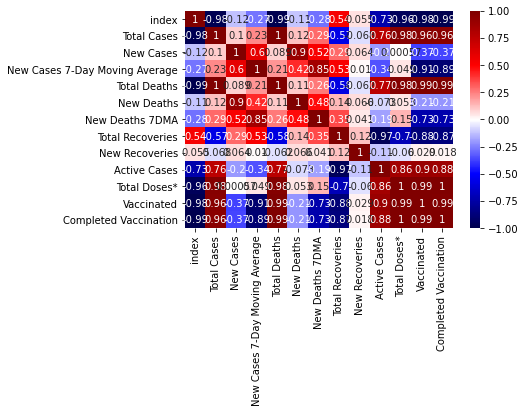

In [47]:
sns.heatmap(data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


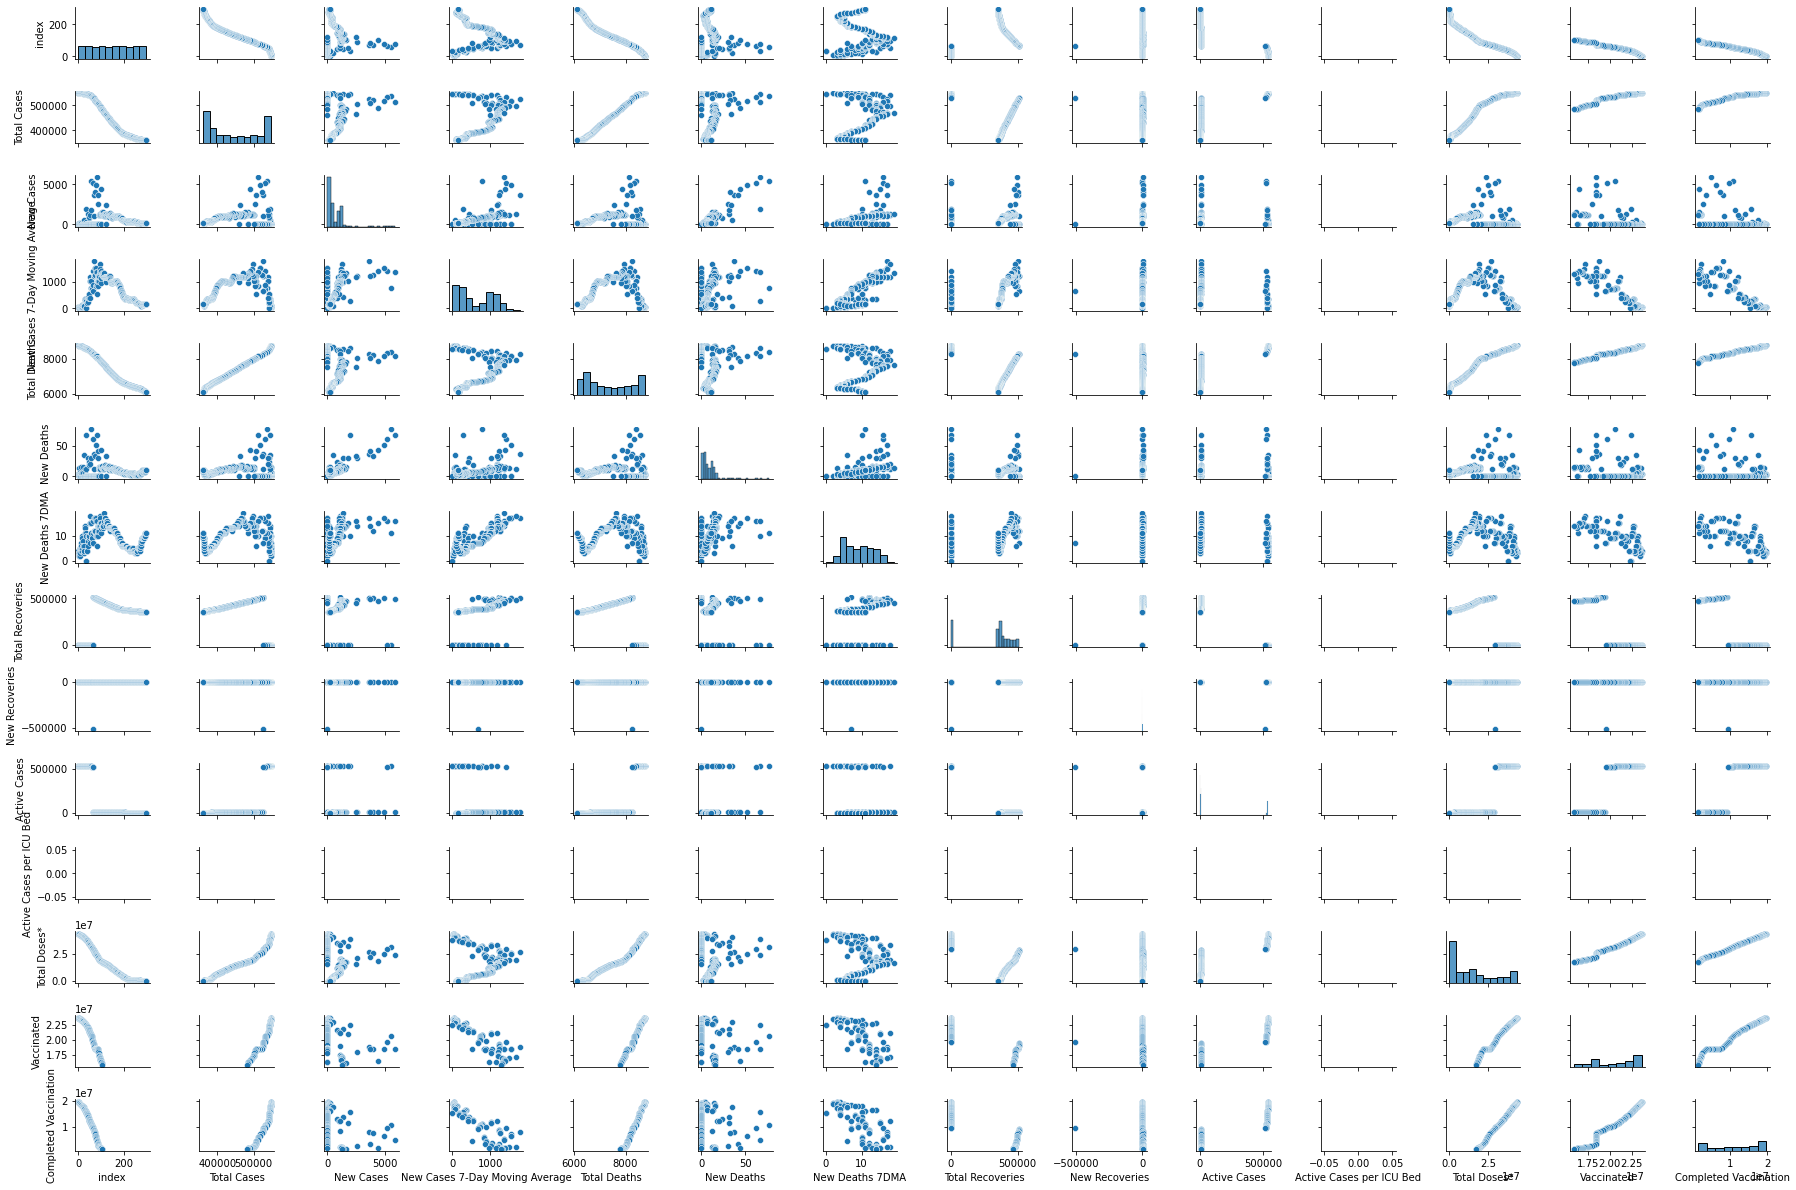

In [48]:
sns.pairplot(data, height=1.2, aspect=1.5);